### Pose Classifier HAC

This notebook explores https://github.com/dronefreak/human-action-classification

In [0]:
!nvidia-smi

Mon May 25 03:37:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    31W / 250W |    389MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp 'drive/My Drive/cs231n-project/datasets/train_frames_keypoints.tar.gz' .
!tar -xzf train_frames_keypoints.tar.gz
!cp 'drive/My Drive/cs231n-project/datasets/val_frames_keypoints.tar.gz' .
!tar -xzf val_frames_keypoints.tar.gz

In [0]:
!cp 'drive/My Drive/cs231n-project/datasets/emotiw/train_frames.tar.gz' .
!tar -xzf train_frames.tar.gz

In [0]:
!ls

content
drive
human-action-classification
Human-Pose-Estimation-Benchmarking-and-Action-Recognition
sample_data
train_frames
train_frames_keypoints.tar.gz
train_frames.tar.gz
val_frames_keypoints.tar.gz


In [0]:
!git clone https://github.com/ChengeYang/Human-Pose-Estimation-Benchmarking-and-Action-Recognition.git

fatal: destination path 'Human-Pose-Estimation-Benchmarking-and-Action-Recognition' already exists and is not an empty directory.


In [0]:
!ls Human-Pose-Estimation-Benchmarking-and-Action-Recognition/model

action_recognition.h5


In [0]:
import tensorflow as tf

model_hac = tf.keras.models.load_model("Human-Pose-Estimation-Benchmarking-and-Action-Recognition/model/action_recognition.h5")
model_hac.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  3456      
_________________________________________________________________
batch_normalization_1 (Batch multiple                  512       
_________________________________________________________________
dense_2 (Dense)              multiple                  8256      
_________________________________________________________________
batch_normalization_2 (Batch multiple                  256       
_________________________________________________________________
dense_3 (Dense)              multiple                  1040      
_________________________________________________________________
batch_normalization_3 (Batch multiple                  64        
_________________________________________________________________
dense_4 (Dense)              multiple                 

In [0]:
!ls content/train_frames_keypoints/1 | head

frame_101_10.mp4_0_keypoints.json
frame_101_10.mp4_10_keypoints.json
frame_101_10.mp4_11_keypoints.json
frame_101_10.mp4_12_keypoints.json
frame_101_10.mp4_13_keypoints.json
frame_101_10.mp4_14_keypoints.json
frame_101_10.mp4_1_keypoints.json
frame_101_10.mp4_2_keypoints.json
frame_101_10.mp4_3_keypoints.json
frame_101_10.mp4_4_keypoints.json


In [0]:
import numpy as np

def normalize(x_input):
    # Separate original data into x_list and y_list
    lx = []
    ly = []
    N = len(x_input)
    i = 0
    while i<N:
        lx.append(x_input[i])
        ly.append(x_input[i+1])
        i+=2
    lx = np.array(lx)
    ly = np.array(ly)

    # Get rid of undetected data (=0)
    non_zero_x = []
    non_zero_y = []
    for i in range(int(N/2)):
        if lx[i] != 0:
            non_zero_x.append(lx[i])
        if ly[i] != 0:
            non_zero_y.append(ly[i])
    if len(non_zero_x) == 0 or len(non_zero_y) == 0:
        return np.array([0] * N)

    # Normalization x/y data according to the bounding box
    origin_x = np.min(non_zero_x)
    origin_y = np.min(non_zero_y)
    len_x = np.max(non_zero_x) - np.min(non_zero_x)
    len_y = np.max(non_zero_y) - np.min(non_zero_y)
    x_new = []
    for i in range(int(N/2)):
        if (lx[i] + ly[i]) == 0:
            x_new.append(-1)
            x_new.append(-1)
        else:
            x_new.append((lx[i] - origin_x) / len_x)
            x_new.append((ly[i] - origin_y) / len_y)
    return x_new


In [0]:
!cat content/train_frames_keypoints/1/frame_101_10.mp4_14_keypoints.json

{"version":1.3,"people":[{"person_id":[-1],"pose_keypoints_2d":[0,0,0,209.971,98.7127,0.658937,194.33,96.1201,0.349296,0,0,0,0,0,0,224.744,98.7109,0.769956,225.662,129.148,0.686624,221.285,150.872,0.238,219.561,153.469,0.631394,210.864,154.339,0.598728,203.005,191.748,0.691467,201.3,235.18,0.171574,230.834,151.758,0.64706,232.553,196.928,0.81367,247.353,243.009,0.782656,0,0,0,203.028,85.6599,0.0642694,0,0,0,210.854,78.7416,0.603816,233.445,254.324,0.703712,239.531,254.333,0.694996,253.433,247.358,0.762885,0,0,0,0,0,0,0,0,0],"face_keypoints_2d":[],"hand_left_keypoints_2d":[],"hand_right_keypoints_2d":[],"pose_keypoints_3d":[],"face_keypoints_3d":[],"hand_left_keypoints_3d":[],"hand_right_keypoints_3d":[]},{"person_id":[-1],"pose_keypoints_2d":[0,0,0,184.792,107.429,0.879511,209.987,109.14,0.810892,211.732,150.027,0.71864,194.334,162.168,0.0532194,163.046,103.061,0.816411,142.148,129.183,0.881285,163.026,130.004,0.0995656,170.026,183.027,0.633977,184.768,184.762,0.553374,205.625,240.386,

In [0]:
def get_body_joints(x):
    body_parts = [
        1, # neck       --
        2, # r shoulder
        3, # r elbow
        4, # r wrist
        5, # l shoulder
        6, # l elbow
        7, # l wrist
        9, # r hip
        10, # r knee
        11, # r ankle
        12, # l hip
        13, # l knee
        14, # l ankle   -- 
    ]
    body_parts_xy = []
    for b in body_parts:
        body_parts_xy.append(b * 3)
        body_parts_xy.append(b * 3 + 1)
    return x[body_parts_xy]

In [0]:
import json
keypoint_file = "content/train_frames_keypoints/2/frame_74_24.mp4_11_keypoints.json"
with open(keypoint_file) as json_file:
    keypoint_data = json.load(json_file)
    for person in keypoint_data["people"]:
        # Each person is assigned the label of the video
        kp = np.array(person["pose_keypoints_2d"])
        
        # Filter for body joints
        kp = get_body_joints(kp)
        orig_kp = kp.copy()
        # print(kp)
        kp = normalize(kp)
        # print(len(kp))
        # print(kp)
        output = model.predict([kp])
        out = np.argmax(output)
        print(output)
        cats = ["kick", "punch", "squat", "stand", "wave"]
        print(f"Selected {cats[out]}")
        break


[[9.9949849e-01 5.1305076e-05 5.3988922e-05 3.1779805e-04 7.8402081e-05]]
Selected kick


[406.396 116.965 384.678 114.35  365.558 142.159 344.739 116.111 427.308
 121.29  422.951 176.095 415.129 155.23  387.296 177.828 344.742 191.718
 344.725 268.24  415.983 187.369 364.673 183.015 358.594 261.252]
[406.396 384.678 365.558 344.739 427.308 422.951 415.129 387.296 344.742
 344.725 415.983 364.673 358.594]
[116.965 114.35  142.159 116.111 121.29  176.095 155.23  177.828 191.718
 268.24  187.369 183.015 261.252]


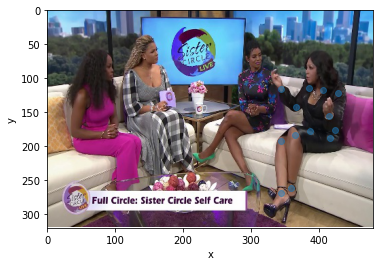

In [0]:
import numpy as np
import matplotlib.pyplot as plt

print(orig_kp)
orig_kp = np.array(orig_kp)
x = orig_kp[np.arange(0, 26, 2)]
y = orig_kp[np.arange(1, 26, 2)]
print(x)
print(y)

img = plt.imread('train_frames/2/frame_74_24.mp4_11.jpg')
plt.imshow(img)
plt.scatter(x, y, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0, 480])
plt.ylim([320, 0])
plt.show()

[0.589483195909105, 0.005232642251930268, 0.16098657931756802, 0.025341071709742365, 0.0, 0.49001783142246413, 0.5626007578013494, 0.5201493911809701, 1.0, 0.0, 0.9463583435160752, 0.5050196993932436, 0.23257724336923796, 0.3991757687876319, 0.2145152843808724, 0.9596251043652417, -1, -1, -1, -1, 0.7590130099499934, 1.0, -1, -1, -1, -1]
[ 0.5894832   0.16098658  0.          0.56260076  1.          0.94635834
  0.23257724  0.21451528 -1.         -1.          0.75901301 -1.
 -1.        ]
[ 0.00523264  0.02534107  0.49001783  0.52014939  0.          0.5050197
  0.39917577  0.9596251  -1.         -1.          1.         -1.
 -1.        ]


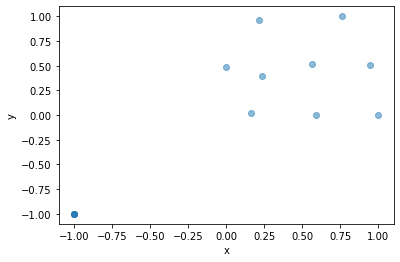

In [0]:
import numpy as np
import matplotlib.pyplot as plt

print(kp)
# # Create data
# N = 500
# x = np.random.rand(N)
# y = np.random.rand(N)
# colors = (0,0,0)
# area = np.pi*3
kp = np.array(kp)
x = kp[np.arange(0, 26, 2)]
y = kp[np.arange(1, 26, 2)]
print(x)
print(y)

# # Plot
plt.scatter(x, y, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
import numpy as np
import random
import cv2
from os import listdir
from os.path import isfile, join

class DataPreviewGenerator(tf.keras.utils.Sequence):
    """
    Generates data based on a directory of frames. Keypoints are added directly onto the images
    Used primarily for visualization purposes.
    """
    def __init__(self, dir, keyframe_dir, batch_size=32, frames_to_use=-1, shuffle=True):
        self.frames_to_use = frames_to_use
        self.batch_size = batch_size
        self.dir = dir
        self.keyframe_dir = keyframe_dir
        self.shuffle = shuffle
        self.classes = self.find_classes()
        self.video_names, self.video_map, self.video_to_class, self.num_samples, self.min_frames = self.find_samples()
        self.on_epoch_end()
        print(f"Found {self.num_samples} frames belonging to {len(self.video_names)} videos belonging to {len(self.classes)} classes.")
        print(f"Min frames determined to be {self.min_frames}")

    def find_classes(self):
        category_folders = [f for f in listdir(self.dir) if not isfile(join(self.dir, f))]
        return sorted(list(set(category_folders)))

    def find_samples(self):
        """
        Returns the following video frame structure:

        {
            "vid1": [
                "frame1.jpg",
                "frame2.jpg",
                ...
            ]
        }

        """
        num_samples = 0
        min_frames = -1
        video_map = {}
        vid_to_cat = {}
        category_folders = [f for f in listdir(self.dir) if not isfile(join(self.dir, f))]
        for category_folder in category_folders:
            cat_path = join(self.dir, category_folder)
            frames = [f for f in listdir(cat_path) if isfile(join(cat_path, f))]
            for frame in frames:
                # frame = frame_101_7.mp4_8.jpg
                frame_arr = frame.split(".mp4_")
                vid_name = frame_arr[0]
                if vid_name not in video_map:
                    video_map[vid_name] = []
                    vid_to_cat[vid_name] = category_folder
                video_map[vid_name].append(frame)
            
            for k in video_map.keys():
                # make sure the frames for each video are in sorted order
                video_map[vid_name] = sorted(video_map[vid_name])
                if min_frames == -1 or len(video_map[vid_name]) < min_frames:
                    min_frames = len(video_map[vid_name])

        return list(video_map.keys()), video_map, vid_to_cat, len(vid_to_cat), min_frames

    def __len__(self):
        """
        Denotes the number of batches per epoch
        """
        return int(np.floor(self.num_samples / self.batch_size))

    def __getitem__(self, index):
        """
        Generate one batch of data
        """
        video_names = self.video_names[index*self.batch_size:(index+1)*self.batch_size]

        # print(f"Working on batch {index} with {len(video_names)} videos")

        num_frames = self.min_frames if self.frames_to_use == -1 else self.frames_to_use
        X = np.zeros((len(video_names), num_frames, IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)
        y = []
        i = 0
        for vid in video_names:
            j = 0
            for frame in self.video_map[vid]:
                # print("   " + frame)
                keypoint_file = frame.replace(".jpg", "_keypoints.json")
                keypoint_file = join(join(self.keyframe_dir, self.video_to_class[vid]), keypoint_file)

                frame_path = join(join(self.dir, self.video_to_class[vid]), frame)
                img = cv2.imread(frame_path)

                actions = []
                with open(keypoint_file) as json_file:
                    keypoint_data = json.load(json_file)
                    for person in keypoint_data["people"]:
                        # Each person is assigned the label of the video
                        kp = np.array(person["pose_keypoints_2d"])
                        try:
                            # Filter for body joints
                            kp2 = get_body_joints(kp)
                            if np.count_nonzero(kp2==0) < 2:
                                kp2 = normalize(kp2)
                                # print(kp2)
                                output = model.predict([kp2])
                                out = np.argmax(output)
                                cats = ["kick", "punch", "squat", "stand", "wave"]
                                actions.append(cats[out])
                        except:
                            pass
                            
                        kp = get_body_joints(kp)
                        for c in range(26):
                            if c % 2 == 0:
                                cv2.circle(img, (int(kp[c]), int(kp[c + 1])), 5, (0,255,0), -1)


                print(f"Video {frame} at index {i} with actions {actions}")
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # Assume resized already
                # img = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT), interpolation = cv2.INTER_CUBIC)
                # print(img[0])
                X[i, j, :, :, :] = img
                j += 1
                if j >= num_frames:
                    break

            y.append(int(self.video_to_class[vid]) - 1)
            # print(f"{vid} - {int(self.video_to_class[vid]) - 1}")
            i += 1
        y = np.array(y)
        return X, tf.keras.utils.to_categorical(y, num_classes=len(self.classes))

    def on_epoch_end(self):
        # print("on_epoch_end")
        if self.shuffle == True:
            np.random.shuffle(self.video_names)


Found 2661 frames belonging to 2661 videos belonging to 3 classes.
Min frames determined to be 13
Video frame_203_17.mp4_2.jpg at index 0 with actions []
Video frame_6_35.mp4_12.jpg at index 1 with actions []
Video frame_230_5.mp4_10.jpg at index 2 with actions ['wave', 'kick', 'wave', 'wave', 'stand', 'kick', 'wave', 'wave']
Video frame_334_9.mp4_0.jpg at index 3 with actions []
Video frame_160_5.mp4_2.jpg at index 4 with actions []
Video frame_203_3.mp4_2.jpg at index 5 with actions []
Video frame_38_15.mp4_10.jpg at index 6 with actions []
Video frame_180_11.mp4_4.jpg at index 7 with actions []
Video frame_324_121.mp4_7.jpg at index 8 with actions ['stand']
Video frame_88_6.mp4_3.jpg at index 9 with actions ['kick']
Video frame_203_15.mp4_4.jpg at index 10 with actions []
Video frame_133_4.mp4_9.jpg at index 11 with actions []
Video frame_134_2.mp4_11.jpg at index 12 with actions []
Video frame_122_2.mp4_7.jpg at index 13 with actions ['kick', 'kick']
Video frame_6_13.mp4_7.jpg at i

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


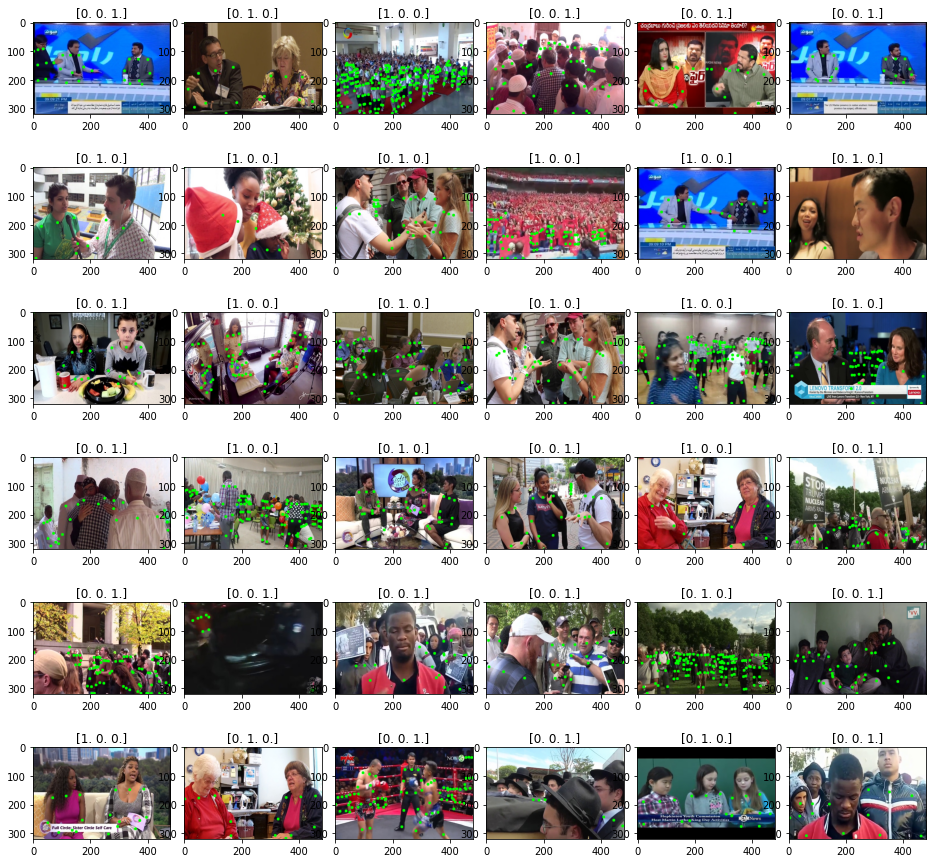

In [0]:


IMG_WIDTH = 480
IMG_HEIGHT = 320
BATCH_SIZE = 36
FRAMES = 12

train_preview_generator = DataPreviewGenerator("train_frames", "content/train_frames_keypoints", frames_to_use=1, batch_size=64)


def show_batch(image_batch, label_batch):
    n_row = 6
    n_column = 6
    
    f, ax = plt.subplots(n_row, n_column)
    for i in range(n_row):
        for j in range(n_column):
            ax[i, j].imshow(image_batch[i*n_row + j, 0])
            ax[i, j].title.set_text(label_batch[i*n_row + j])
    plt.subplots_adjust(wspace=0.1, hspace=0)
    f.set_size_inches(16, 16)
    plt.show()

image_batch, label_batch = train_preview_generator.__getitem__(1)
show_batch(image_batch, label_batch)


In [0]:
#
# CONFIGURATION
#
# Define any constants for the model here
#

IMG_WIDTH = 480
IMG_HEIGHT = 320
BATCH_SIZE = 64
MODEL_NAME = "pose-classifier-hac"

In [0]:
import numpy as np
import random
import cv2
from os import listdir
from os.path import isfile, join
import json

class DataGeneratorKeyframeOnly(tf.keras.utils.Sequence):
    """
    Generates data based on a directory of keypoints
    """
    def __init__(self, dir, batch_size=32, frames_to_use=-1, shuffle=True):
        self.frames_to_use = frames_to_use
        self.batch_size = batch_size
        self.dir = dir
        self.shuffle = shuffle
        self.classes = self.find_classes()
        self.keypoints, self.labels, self.names = self.find_samples()
        self.num_samples = len(self.labels)
        self.on_epoch_end()
        print(f"Found {self.num_samples} keypoints belonging to {len(self.classes)} classes.")

    def find_classes(self):
        category_folders = [f for f in listdir(self.dir) if not isfile(join(self.dir, f))]
        return sorted(list(set(category_folders)))

    def find_samples(self):
        """
        """
        keypoints = []
        labels = []
        names = []
        category_folders = [f for f in listdir(self.dir) if not isfile(join(self.dir, f))]
        for category_folder in category_folders:
            cat_path = join(self.dir, category_folder)
            keypoint_files = [f for f in listdir(cat_path) if isfile(join(cat_path, f))]
            vid_names = {}
            s = 0
            for keypoint_file in sorted(keypoint_files):
                # NOTE: Sorting automatically means keypoints for each file will be parsed frame by frame in order
                # keypoint_file = frame_101_10.mp4_0_keypoints.json
                keypoint_file_arr = keypoint_file.split(".mp4_")
                vid_name = keypoint_file_arr[0]
                if vid_name in vid_names:
                    continue
                else:
                    vid_names[vid_name] = True
                kps = []
                with open(join(cat_path, keypoint_file)) as json_file:
                    keypoint_data = json.load(json_file)
                    for person in keypoint_data["people"]:
                        # Each person is assigned the label of the video
                        kp = np.array(person["pose_keypoints_2d"])

                        try:
                            # Filter for body joints
                            kp = get_body_joints(kp)
                            kp = normalize(kp)
                            kps.append(kp)
                        except:
                            continue

                if len(kps) > 0:
                    output = model_hac.predict(np.array(kps))
                    keypoints.append(np.average(output, axis=0))
                    labels.append(int(category_folder) - 1)
                    names.append(keypoint_file)
                s += 1
                if s % 1000 == 0:
                    print(f"   Done {s}")

        labels = np.array(labels)
        names = np.array(names)
        keypoints = np.array(keypoints)
        print(keypoints.shape)
        print(labels.shape)
        print(names.shape)
        return keypoints, labels, names

    def __len__(self):
        """
        Denotes the number of batches per epoch
        """
        return int(np.floor(self.num_samples / self.batch_size))

    def __getitem__(self, index):
        """
        Generate one batch of data
        """
        X = self.keypoints[index*self.batch_size:(index+1)*self.batch_size, :]
        return X, tf.keras.utils.to_categorical(self.labels[index*self.batch_size:(index+1)*self.batch_size], num_classes=len(self.classes))

    def on_epoch_end(self):
        if self.shuffle == True:
            indices = np.arange(0, len(self.keypoints))
            np.random.shuffle(indices)
            self.keypoints = self.keypoints[indices, :]
            self.labels = self.labels[indices]
            self.names = self.names[indices]




In [0]:
train_generator = DataGeneratorKeyframeOnly("content/train_frames_keypoints", frames_to_use=1, batch_size=BATCH_SIZE)
validation_generator = DataGeneratorKeyframeOnly("content/val_frames_keypoints", frames_to_use=1, batch_size=BATCH_SIZE)

X, y = train_generator.__getitem__(0)
print(X)
print(y)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


(2660, 5)
(2660,)
(2660,)
Found 2660 keypoints belonging to 3 classes.
(764, 5)
(764,)
(764,)
Found 764 keypoints belonging to 3 classes.
[[9.97829020e-01 2.22625735e-04 8.60623501e-08 1.84906792e-08
  1.94822054e-03]
 [1.25176460e-01 4.30792332e-01 4.67421077e-02 2.38505930e-01
  1.58783138e-01]
 [3.72010469e-01 2.15562172e-02 1.07546531e-01 4.70025182e-01
  2.88615674e-02]
 [8.40385020e-01 3.31980316e-03 4.53730026e-04 1.50498271e-01
  5.34311496e-03]
 [8.25681567e-01 9.11711603e-02 4.30235486e-05 8.64387948e-06
  8.30956250e-02]
 [5.06471097e-01 3.51935029e-01 5.01372712e-03 2.70453427e-04
  1.36309698e-01]
 [9.99855399e-01 1.44545935e-04 4.83095942e-12 4.98829067e-08
  2.65277968e-08]
 [9.93004382e-01 3.50421673e-04 1.26815314e-06 5.87865198e-03
  7.65311241e-04]
 [6.66682780e-01 1.50984888e-05 2.93461519e-04 4.39752284e-07
  3.33008200e-01]
 [9.51998055e-01 1.83132404e-04 3.89320921e-05 2.13033672e-07
  4.77796532e-02]
 [4.92532223e-01 4.22315598e-01 4.34687619e-09 1.81098212e-08


In [0]:

X, y = train_generator.__getitem__(5)
print(train_generator.num_samples)


2660


In [0]:
from pathlib import Path

Path(f"drive/My Drive/checkpoints/{MODEL_NAME}").mkdir(parents=True, exist_ok=True)
checkpoint_path = "drive/My Drive/checkpoints/" + MODEL_NAME + "/cp-{epoch:04d}.ckpt"

# Create a callback that saves the model's weights every 1 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    period=1)

def create_model(inputs):
    x = tf.keras.layers.Dense(32, activation='relu')(inputs)
    x = tf.keras.layers.Dense(3, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=x)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])
    return model

inputs = tf.keras.Input(shape=(5))
model = create_model(inputs)
model.summary()




Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                192       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [0]:
import pickle
history = model.fit(
          train_generator,
          epochs=100,
          callbacks=[cp_callback],
          validation_data=validation_generator
)


Epoch 1/100
24/41 [================>.............] - ETA: 0s - loss: 1.0671 - accuracy: 0.4284
Epoch 00001: saving model to drive/My Drive/checkpoints/pose-classifier-hac/cp-0001.ckpt
41/41 [==============================] - 0s 5ms/step - loss: 1.0678 - accuracy: 0.4303 - val_loss: 1.0846 - val_accuracy: 0.4105
Epoch 2/100
22/41 [===============>..............] - ETA: 0s - loss: 1.0614 - accuracy: 0.4425
Epoch 00002: saving model to drive/My Drive/checkpoints/pose-classifier-hac/cp-0002.ckpt
41/41 [==============================] - 0s 8ms/step - loss: 1.0702 - accuracy: 0.4253 - val_loss: 1.0952 - val_accuracy: 0.3466
Epoch 3/100
24/41 [================>.............] - ETA: 0s - loss: 1.0694 - accuracy: 0.4160
Epoch 00003: saving model to drive/My Drive/checkpoints/pose-classifier-hac/cp-0003.ckpt
41/41 [==============================] - 0s 5ms/step - loss: 1.0707 - accuracy: 0.4226 - val_loss: 1.0967 - val_accuracy: 0.3835
Epoch 4/100
22/41 [===============>..............] - ETA: 0s 

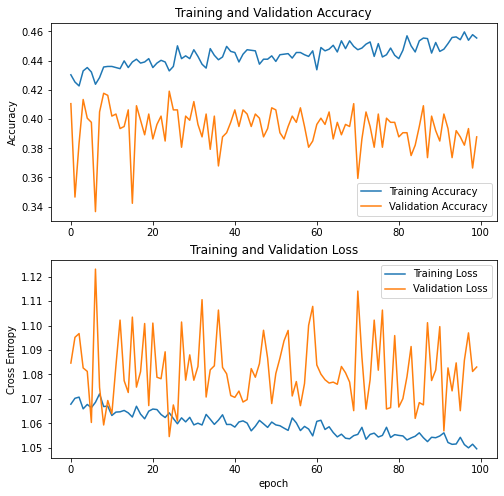

In [0]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
